In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
import xgboost as xgb

In [12]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [13]:
df=pd.read_csv("adult.csv")


In [14]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [15]:
df.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [16]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [18]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [19]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

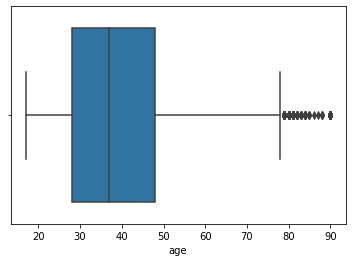

In [20]:
sns.boxplot(df['age'])

In [21]:
q1=df['age'].quantile(0.25)

In [22]:
q3=df['age'].quantile(0.75)

In [23]:
IQR=q3-q1

In [24]:
lower=q1-1.5*IQR

In [25]:
upper=q3+1.5*IQR

In [26]:
df=df[(df['age']>lower) & (df['age']<upper)]

In [27]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hours.per.week'>

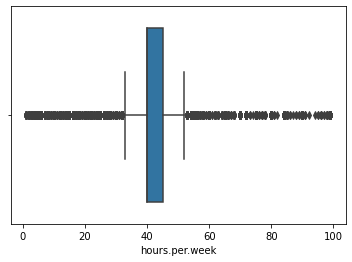

In [28]:
sns.boxplot(df['hours.per.week'])

In [29]:
q1=df['hours.per.week'].quantile(0.25)

In [30]:
q3=df['hours.per.week'].quantile(0.75)

In [31]:
IQR=q3-q1

In [32]:
lower=q1-1.5*IQR

In [33]:
upper=q3+1.5*IQR

In [34]:
df=df[(df['hours.per.week']>lower) & (df['hours.per.week']<upper)]

In [35]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hours.per.week'>

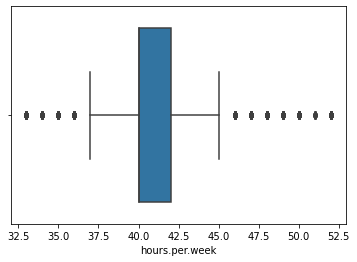

In [36]:
sns.boxplot(df['hours.per.week'])

In [37]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education.num'>

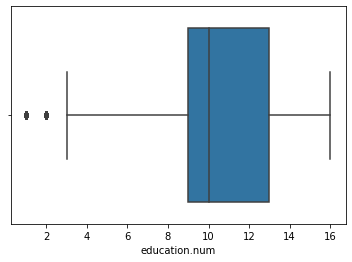

In [38]:
sns.boxplot(df['education.num'])

In [39]:
q1=df['education.num'].quantile(0.25)

In [40]:
q3=df['education.num'].quantile(0.75)

In [41]:
IQR=q3-q1

In [42]:
lower=q1-1.5*IQR

In [43]:
upper=q3+1.5*IQR

In [44]:
df=df[(df['education.num']>lower) & (df['education.num']<upper)]

In [45]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education.num'>

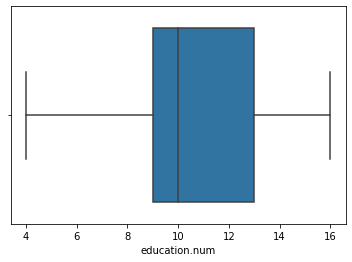

In [46]:
sns.boxplot(df['education.num'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capital.loss'>

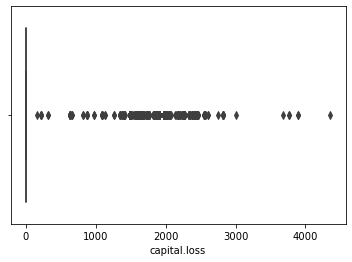

In [47]:
sns.boxplot(df['capital.loss'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fnlwgt'>

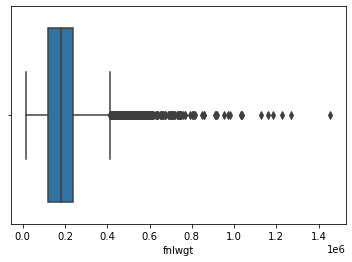

In [48]:
sns.boxplot(df['fnlwgt'])

In [49]:
q1=df['fnlwgt'].quantile(0.25)

In [50]:
q3=df['fnlwgt'].quantile(0.75)

In [51]:
IQR=q3-q1

In [52]:
lower=q1-1.5*IQR

In [53]:
upper=q3+1.5*IQR

In [54]:
df=df[(df['fnlwgt']>lower) & (df['fnlwgt']<upper)]

In [55]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fnlwgt'>

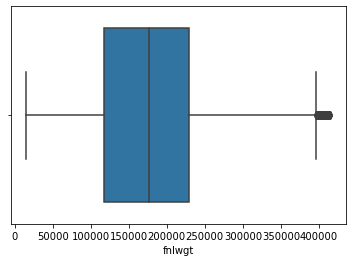

In [56]:
sns.boxplot(df['fnlwgt'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capital.gain'>

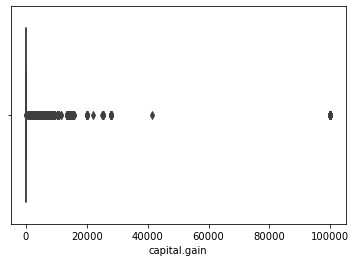

In [57]:
sns.boxplot(df['capital.gain'])

In [58]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [59]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

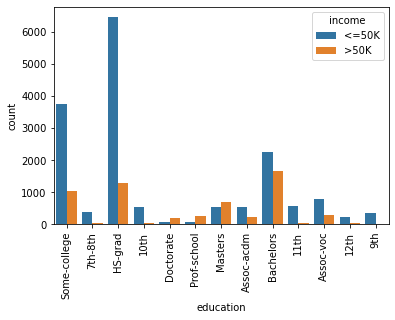

In [60]:
sns.countplot(x=df['education'],hue=df['income'])
plt.xticks(rotation=90)
plt.show()

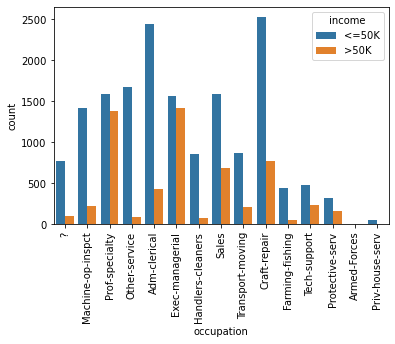

In [61]:
sns.countplot(x=df['occupation'],hue=df['income'])
plt.xticks(rotation=90)
plt.show()

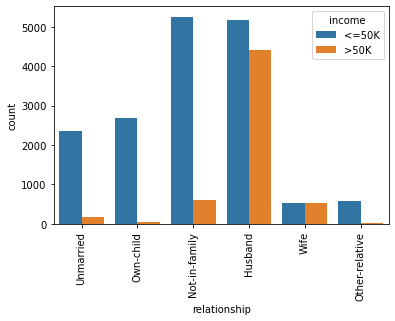

In [62]:
sns.countplot(x=df['relationship'],hue=df['income'])
plt.xticks(rotation=90)
plt.show()

In [63]:
df.groupby("relationship")['income'].value_counts()

relationship    income
Husband         <=50K     5167
                >50K      4406
Not-in-family   <=50K     5255
                >50K       614
Other-relative  <=50K      583
                >50K        29
Own-child       <=50K     2686
                >50K        53
Unmarried       <=50K     2346
                >50K       162
Wife            >50K       540
                <=50K      521
Name: income, dtype: int64

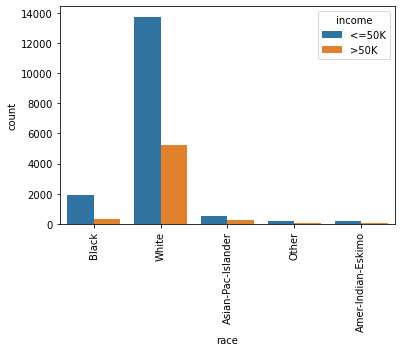

In [64]:
sns.countplot(x=df['race'],hue=df['income'])
plt.xticks(rotation=90)
plt.show()

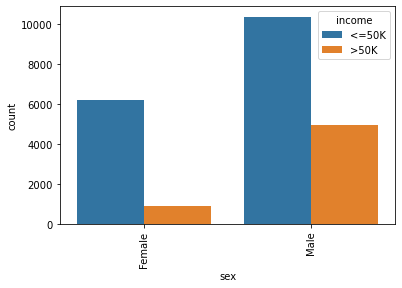

In [65]:
sns.countplot(x=df['sex'],hue=df['income'])
plt.xticks(rotation=90)
plt.show()

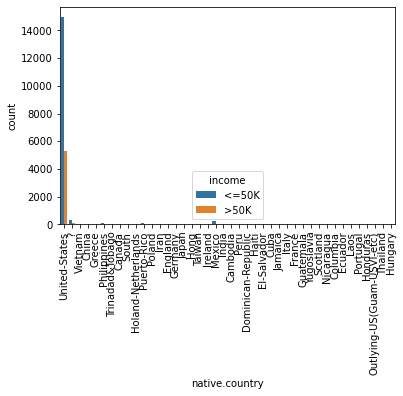

In [66]:
sns.countplot(x=df['native.country'],hue=df['income'])
plt.xticks(rotation=90)
plt.show()

In [67]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


<AxesSubplot:xlabel='sex', ylabel='hours.per.week'>

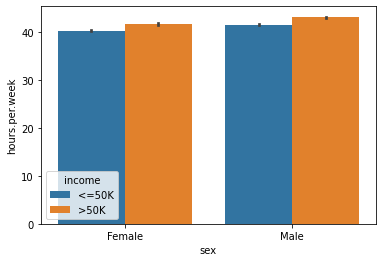

In [68]:
sns.barplot(x=df['sex'],y=df['hours.per.week'],hue=df["income"])

<AxesSubplot:xlabel='sex', ylabel='age'>

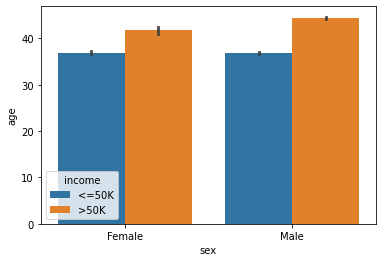

In [69]:
sns.barplot(x=df['sex'],y=df['age'],hue=df["income"])

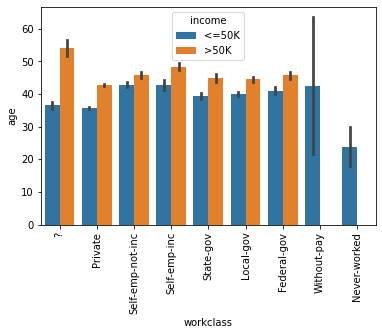

In [70]:
sns.barplot(x=df['workclass'],y=df['age'],hue=df["income"])
plt.xticks(rotation=90)
plt.show()

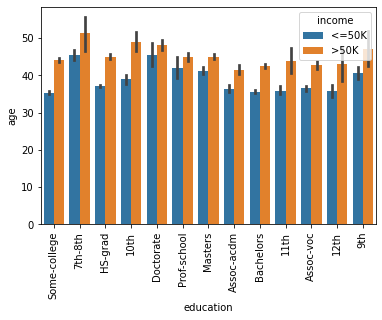

In [71]:
sns.barplot(x=df['education'],y=df['age'],hue=df["income"])
plt.xticks(rotation=90)
plt.show()

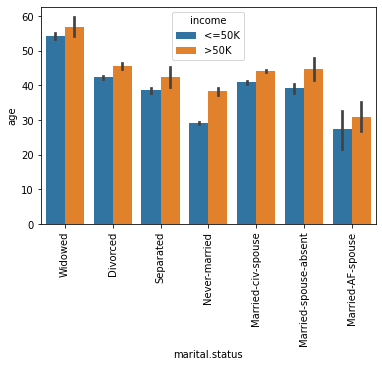

In [72]:
sns.barplot(x=df['marital.status'],y=df['age'],hue=df["income"])
plt.xticks(rotation=90)
plt.show()

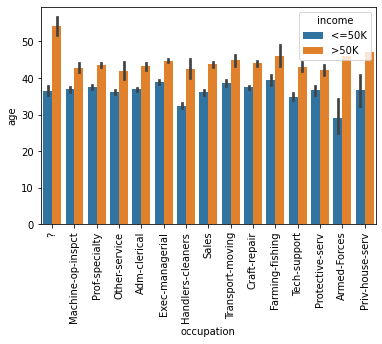

In [73]:
sns.barplot(x=df['occupation'],y=df['age'],hue=df["income"])
plt.xticks(rotation=90)
plt.show()

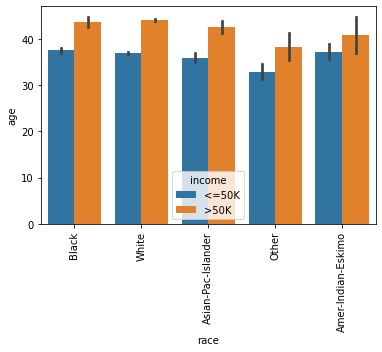

In [74]:
sns.barplot(x=df['race'],y=df['age'],hue=df["income"])
plt.xticks(rotation=90)
plt.show()

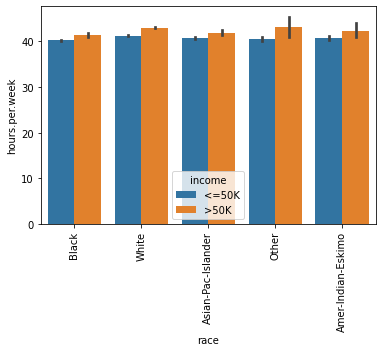

In [75]:
sns.barplot(x=df['race'],y=df['hours.per.week'],hue=df["income"])
plt.xticks(rotation=90)
plt.show()

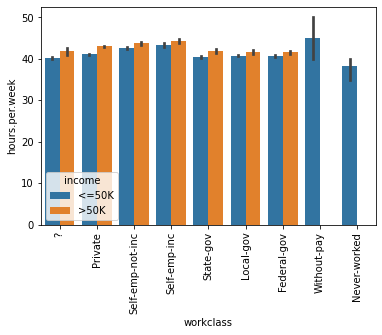

In [76]:
sns.barplot(x=df['workclass'],y=df['hours.per.week'],hue=df["income"])
plt.xticks(rotation=90)
plt.show()

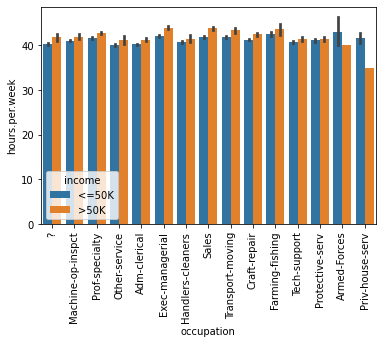

In [77]:
sns.barplot(x=df['occupation'],y=df['hours.per.week'],hue=df["income"])
plt.xticks(rotation=90)
plt.show()

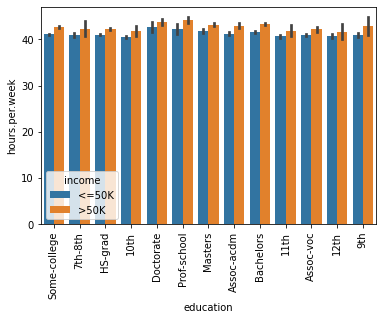

In [78]:
sns.barplot(x=df['education'],y=df['hours.per.week'],hue=df["income"])
plt.xticks(rotation=90)
plt.show()

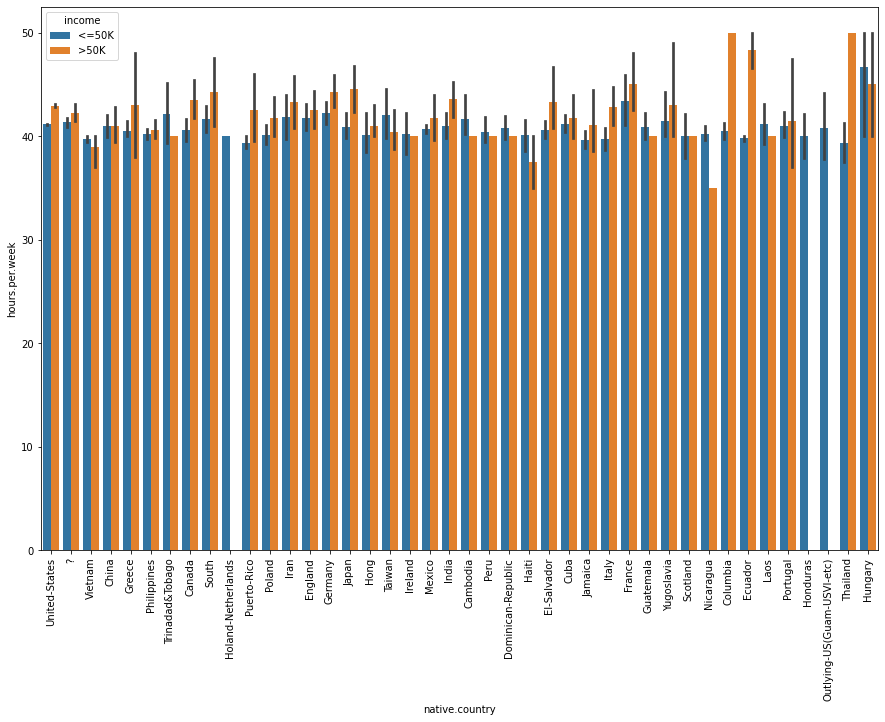

In [79]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['native.country'],y=df['hours.per.week'],hue=df["income"])
plt.xticks(rotation=90)
plt.show()

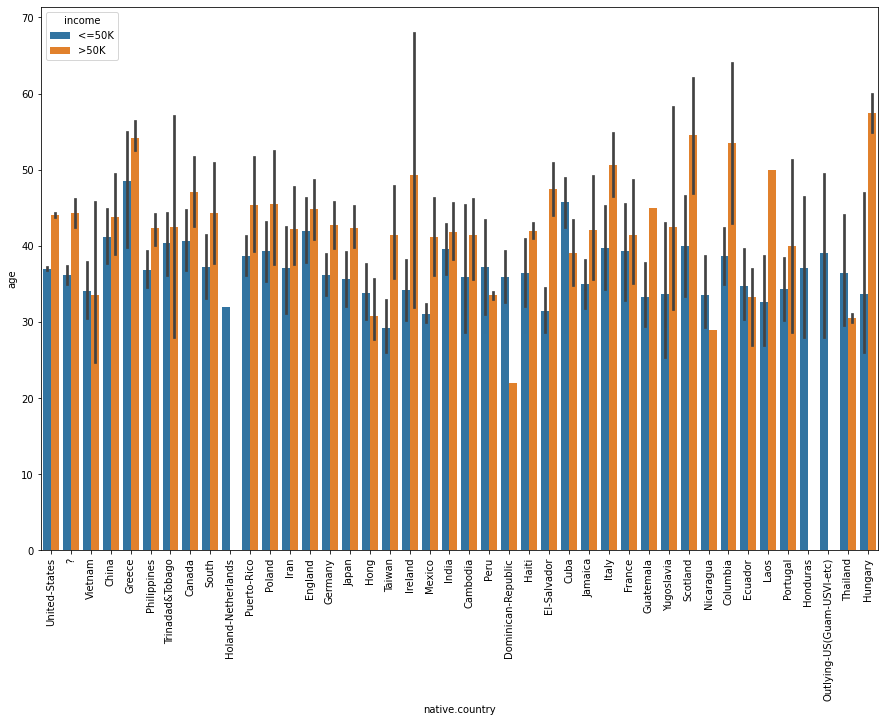

In [80]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['native.country'],y=df['age'],hue=df["income"])
plt.xticks(rotation=90)
plt.show()

In [81]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


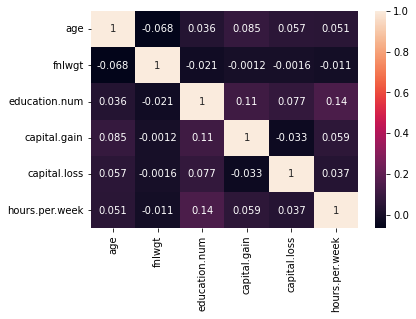

In [82]:
sns.heatmap(df.corr(),annot=True)
plt.show()

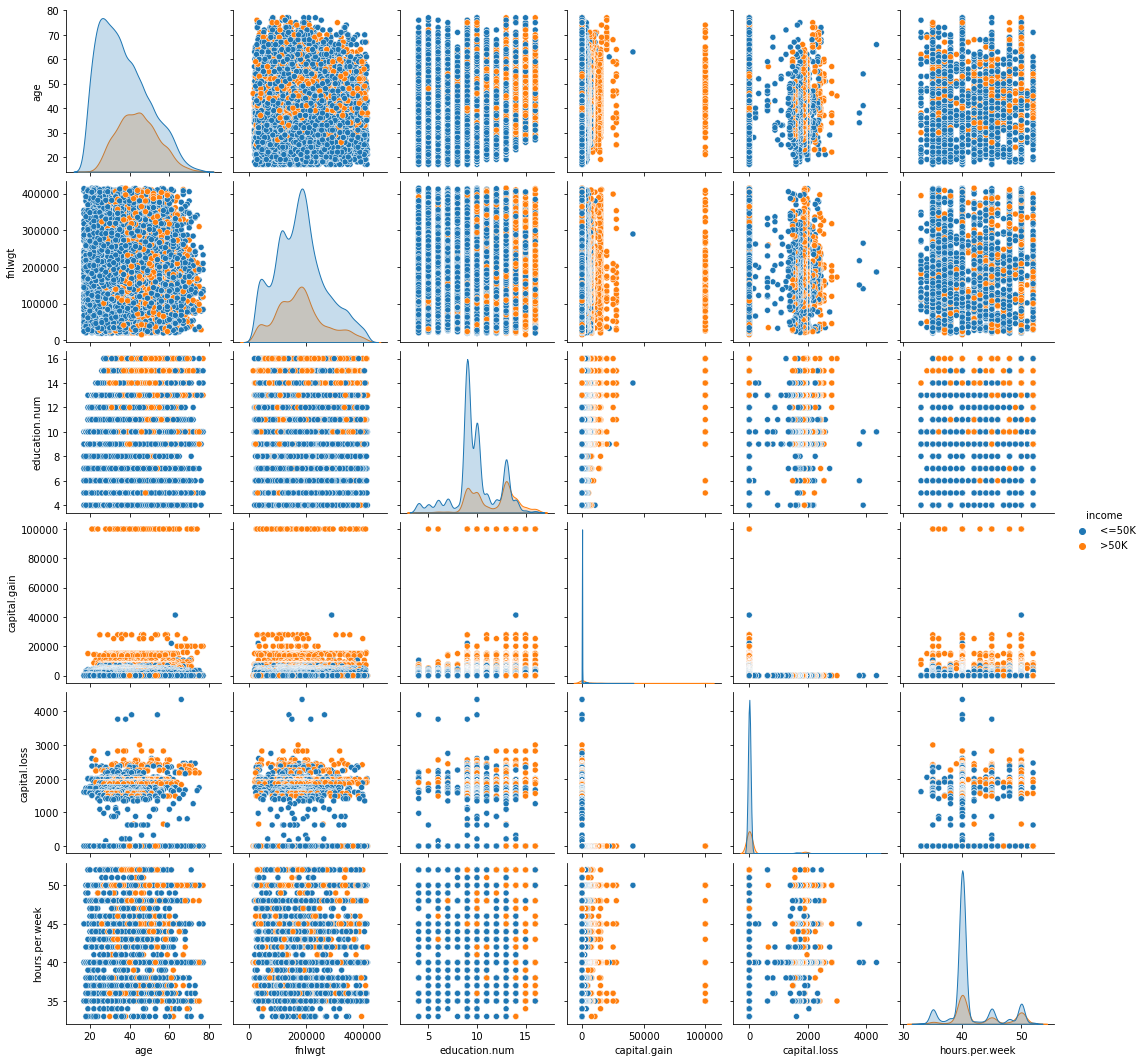

In [83]:
sns.pairplot(data=df,hue='income')

In [84]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [85]:
le=LabelEncoder()


In [86]:
df['education']=le.fit_transform(df['education'])



C:\Users\himanshu\AppData\Local\Temp\ipykernel_25464\2927521148.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['education']=le.fit_transform(df['education'])


In [87]:
df['workclass']=le.fit_transform(df['workclass'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_25464\3240307165.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['workclass']=le.fit_transform(df['workclass'])


In [88]:
df['marital.status']=le.fit_transform(df['marital.status'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_25464\3456549522.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['marital.status']=le.fit_transform(df['marital.status'])


In [89]:
df['occupation']=le.fit_transform(df['occupation'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_25464\1622587964.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['occupation']=le.fit_transform(df['occupation'])


In [90]:
df['relationship']=le.fit_transform(df['relationship'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_25464\2756492325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['relationship']=le.fit_transform(df['relationship'])


In [91]:
df['race']=le.fit_transform(df['race'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_25464\2002995246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['race']=le.fit_transform(df['race'])


In [92]:
df['sex']=le.fit_transform(df['sex'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_25464\1340687048.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex']=le.fit_transform(df['sex'])


In [93]:
df['native.country']=le.fit_transform(df['native.country'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_25464\2332075896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['native.country']=le.fit_transform(df['native.country'])


In [94]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
2,66,0,186061,12,10,6,0,4,2,0,0,4356,40,39,<=50K
3,54,4,140359,3,4,0,7,4,4,0,0,3900,40,39,<=50K
4,41,4,264663,12,10,5,10,3,4,0,0,3900,40,39,<=50K
5,34,4,216864,9,9,0,8,4,4,0,0,3770,45,39,<=50K
6,38,4,150601,0,6,5,1,4,4,1,0,3770,40,39,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,53,4,321865,10,14,2,4,0,4,1,0,0,40,39,>50K
32556,22,4,310152,12,10,4,11,1,4,1,0,0,40,39,<=50K
32557,27,4,257302,5,12,2,13,5,4,0,0,0,38,39,<=50K
32558,40,4,154374,9,9,2,7,0,4,1,0,0,40,39,>50K


In [95]:
new_df=pd.get_dummies(data=df['income'],drop_first=True)

In [96]:
new_df.columns=["income"]

In [97]:
df=df.drop('income',axis=1)


In [98]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
2,66,0,186061,12,10,6,0,4,2,0,0,4356,40,39
3,54,4,140359,3,4,0,7,4,4,0,0,3900,40,39
4,41,4,264663,12,10,5,10,3,4,0,0,3900,40,39
5,34,4,216864,9,9,0,8,4,4,0,0,3770,45,39
6,38,4,150601,0,6,5,1,4,4,1,0,3770,40,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,53,4,321865,10,14,2,4,0,4,1,0,0,40,39
32556,22,4,310152,12,10,4,11,1,4,1,0,0,40,39
32557,27,4,257302,5,12,2,13,5,4,0,0,0,38,39
32558,40,4,154374,9,9,2,7,0,4,1,0,0,40,39


In [99]:
df=pd.concat([df,new_df],axis=1)

In [100]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
2,66,0,186061,12,10,6,0,4,2,0,0,4356,40,39,0
3,54,4,140359,3,4,0,7,4,4,0,0,3900,40,39,0
4,41,4,264663,12,10,5,10,3,4,0,0,3900,40,39,0
5,34,4,216864,9,9,0,8,4,4,0,0,3770,45,39,0
6,38,4,150601,0,6,5,1,4,4,1,0,3770,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,53,4,321865,10,14,2,4,0,4,1,0,0,40,39,1
32556,22,4,310152,12,10,4,11,1,4,1,0,0,40,39,0
32557,27,4,257302,5,12,2,13,5,4,0,0,0,38,39,0
32558,40,4,154374,9,9,2,7,0,4,1,0,0,40,39,1


In [101]:
sc=StandardScaler()


In [102]:
y=df['income']

In [103]:
X=df.drop('income',axis=1)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [105]:
X_train.shape

(17889, 14)

In [106]:
y.shape

(22362,)

In [107]:
lr=LogisticRegression()


In [108]:
lr.fit(X_train,y_train)

LogisticRegression()

In [109]:
y_pred=lr.predict(X_test)


In [110]:
accuracy_score(y_test,y_pred)

0.7768835233623966

In [111]:
confusion_matrix(y_test,y_pred)

array([[3191,  142],
       [ 856,  284]], dtype=int64)

In [112]:
y_pred=lr.predict(X_train)


In [113]:
accuracy_score(y_train,y_pred)

0.7807032254458047

In [114]:
rfc=RandomForestClassifier()


In [115]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [116]:
y_pred=rfc.predict(X_test)


In [117]:
accuracy_score(y_test,y_pred)

0.8459646769505924

In [118]:
confusion_matrix(y_test,y_pred)

array([[3076,  257],
       [ 432,  708]], dtype=int64)

In [119]:
y_pred=rfc.predict(X_train)


In [120]:
accuracy_score(y_train,y_pred)

0.9998881994521773

In [121]:
dtc=DecisionTreeClassifier()


In [122]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [123]:
y_pred=dtc.predict(X_test)


In [124]:
accuracy_score(y_test,y_pred)

0.7945450480661749

In [125]:
confusion_matrix(y_test,y_pred)

array([[2866,  467],
       [ 452,  688]], dtype=int64)

In [126]:
y_pred=dtc.predict(X_train)


In [127]:
accuracy_score(y_train,y_pred)

0.9999440997260887

In [128]:
xgb_i=xgb.XGBClassifier()

In [129]:
xgb_i.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [130]:
y_pred=xgb_i.predict(X_test)


In [131]:
accuracy_score(y_test,y_pred)

0.8591549295774648

In [132]:
confusion_matrix(y_test,y_pred)

array([[3108,  225],
       [ 405,  735]], dtype=int64)

In [133]:
y_pred=xgb_i.predict(X_train)


In [134]:
accuracy_score(y_train,y_pred)

0.9106154620157639